In [1]:
!pip install visdom

# Install Torch client
# (STABLE VERSION, NOT ALL CURRENT FEATURES ARE SUPPORTED)
# !luarocks install visdom

# Install python from source
# !pip install -e .
# If the above runs into issues, you can try the below
# easy_install .

# Install Torch client from source (from th directory)
# luarocks make

     |████████████████████████████████| 676 kB 9.6 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=99179d5fe11469f1677bfb797ffabeebc9616499956a868a8ea37ceedd47c5ec
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=3b08d148cad1489f62ee31d9c9567ce0e1fa1bfd455d2c175c10ed660354e17b
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built visdom torchfile


In [2]:
# !python -m visdom.server

In [3]:
from visdom import Visdom

class VisdomLinePlotter(object):
    """Plots to Visdom"""
    def __init__(self, env_name='main'):
        self.viz = Visdom()
        self.env = env_name
        self.plots = {}
    def plot(self, var_name, split_name, title_name, x, y):
        if var_name not in self.plots:
            self.plots[var_name] = self.viz.line(X=np.array([x,x]), Y=np.array([y,y]), env=self.env, opts=dict(
                legend=[split_name],
                title=title_name,
                xlabel='Epochs',
                ylabel=var_name
            ))
        else:
            self.viz.line(X=np.array([x]), Y=np.array([y]), env=self.env, win=self.plots[var_name], name=split_name, update = 'append')

In [4]:
# global plotter
# plotter = VisdomLinePlotter(env_name='Plots')

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

##Load Dataset

In [ ]:
df1 = pd.read_excel('/content/Confidentiality Clause.xlsx',header = None)
new_header = df1.iloc[2] #grab the first row for the header
df1 = df1[3:] #take the data less the header row
df1.columns = new_header #set the header row as the df1 header

df1["clause"] = "Confidentiality"
df1 = df1[['EXAMPLES','clause']]
df1.head()

In [ ]:
df2 = pd.read_excel('/content/Force majeure.xlsx',header = None)
new_header = df2.iloc[2] #grab the first row for the header
df2 = df2[3:] #take the data less the header row
df2.columns = new_header #set the header row as the df2 header
df2 = df2.rename(columns={"EXAMPLE":"EXAMPLES"})

df2["clause"] = "Force majeure"
df2 = df2[['EXAMPLES','clause']]
df2.head()

In [ ]:
df3 = pd.read_excel('/content/INDEMNITY CLAUSE.xlsx',header = None)
new_header = df3.iloc[2] #grab the first row for the header
df3 = df3[3:] #take the data less the header row
df3.columns = new_header #set the header row as the df3 header

df3["clause"] = "INDEMNITY"
df3 = df3[['EXAMPLES','clause']]
df3.head()

In [ ]:
df4 = pd.read_excel('/content/Litigation.xlsx',header = None)
# print(df4.head())
new_header = df4.iloc[2] #grab the first row for the header
df4 = df4[3:] #take the data less the header row
df4.columns = new_header #set the header row as the df4 header
df4 = df4.rename(columns={"Examples ":"EXAMPLES"})
df4["clause"] = "Litigation"
df4 = df4[['EXAMPLES','clause']]
df4.head()

In [ ]:
df5 = pd.read_excel('/content/SEVERABILITY CLAUSE .xlsx',header = None)
# print(df5.head())
new_header = df5.iloc[2] #grab the first row for the header
df5 = df5[3:] #take the data less the header row
df5.columns = new_header #set the header row as the df5 header
df5 = df5.rename(columns={"EXAMPLES ":"EXAMPLES"})

df5["clause"] = "SEVERABILITY"
df5 = df5[['EXAMPLES','clause']]
df5.head()

In [ ]:
df6= pd.read_csv('/content/Clause-Library-Revised-Mar22.csv')
df6 = df6[["Clause Text"]]
df6 = df6.rename(columns={"Clause Text ":"EXAMPLES"})
df6["clause"] = "none"
df6.head()

In [ ]:
## Combine all the above datasets into one dataframe
df = df1.append([df2, df3,df4,df5,df6])
# df = df2
len(df)

In [4]:
map = {'Confidentiality':46,
          'Force majeure':45,
          'INDEMNITY':42,
          'Litigation':50,
          'SEVERABILITY':43,
          }
df = pd.read_csv("/content/ck_clause_text_id.csv")
r_map= dict((v,k) for k,v in map.items())
df = df.replace({"Clause Id": r_map})
df = df.replace(to_replace = [18, 40, 4, 11, 8, 26, 37, 6, 44,41, 3, 13, 5, 9, 10, 1],value ="none")
df = df.rename(columns={"Clause Text":"EXAMPLES","Clause Id":"clause"})
df.head()
# df['Clause Id'].unique()

,EXAMPLES,clause
0,15. No Third Party Beneficiaries. This Agreeme...,INDEMNITY
1,14. No Third Party Beneficiaries. This Agree...,INDEMNITY
2,to defend lawsuits or settle claims related to...,INDEMNITY
3,The limitation of liability and indemnificatio...,INDEMNITY
4,Super-Majority Voting. Our Certificate of Inco...,INDEMNITY


In [5]:
df['clause'].unique()

array(['INDEMNITY', 'none', 'Force majeure', 'SEVERABILITY'], dtype=object)

In [6]:
##drop empty rows
df.dropna()
len(df)

2474

In [7]:
##Count of number of instances of each clause
df['clause'].value_counts()

none             2227
INDEMNITY         108
SEVERABILITY      107
Force majeure      32
Name: clause, dtype: int64

In [8]:
## Shuffle the dataset
df = df.sample(frac = 1)
df.head()

,EXAMPLES,clause
133,3.2.1 Commercial License Grant. Subject to the...,none
354,['8/4/10'],none
1479,['This Agreement shall become effective on the...,none
138,3.1.1Exclusive License Grant.Subject to the te...,none
2279,Representations and Warranties. To induce Bank...,none


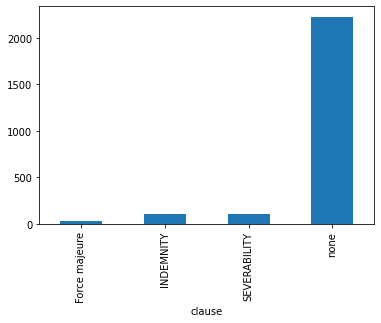

In [9]:
## barchart of data distribution
df.groupby(['clause']).size().plot.bar()

In [10]:
## install transformers
!pip install transformers

     |████████████████████████████████| 4.0 MB 8.2 MB/s 
     |████████████████████████████████| 77 kB 8.6 MB/s 
     |████████████████████████████████| 596 kB 84.9 MB/s 
     |████████████████████████████████| 6.6 MB 84.7 MB/s 
     |████████████████████████████████| 895 kB 65.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Dataset Preparation

In [11]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

labels = {
          # 'Confidentiality':0,
          'Force majeure':0,
          'INDEMNITY':1,
          # 'Litigation':3,
          'SEVERABILITY':2,
          'none':3
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['clause']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['EXAMPLES']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Train-Test Split

In [12]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

1979 247 248


## Model Architecture

In [13]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 4)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

## Model Training

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 124/124 [01:41<00:00,  1.22it/s]


Epochs: 1 | Train Loss:  0.054                 | Train Accuracy:  0.718                 | Val Loss:  0.036                 | Val Accuracy:  0.935


100%|██████████| 124/124 [01:41<00:00,  1.22it/s]


Epochs: 2 | Train Loss:  0.031                 | Train Accuracy:  0.935                 | Val Loss:  0.025                 | Val Accuracy:  0.951


100%|██████████| 124/124 [01:41<00:00,  1.22it/s]


Epochs: 3 | Train Loss:  0.021                 | Train Accuracy:  0.940                 | Val Loss:  0.016                 | Val Accuracy:  0.955


100%|██████████| 124/124 [01:41<00:00,  1.22it/s]


Epochs: 4 | Train Loss:  0.015                 | Train Accuracy:  0.951                 | Val Loss:  0.012                 | Val Accuracy:  0.964


100%|██████████| 124/124 [01:41<00:00,  1.22it/s]


Epochs: 5 | Train Loss:  0.011                 | Train Accuracy:  0.973                 | Val Loss:  0.009                 | Val Accuracy:  0.976


100%|██████████| 124/124 [01:41<00:00,  1.22it/s]


Epochs: 6 | Train Loss:  0.009                 | Train Accuracy:  0.978                 | Val Loss:  0.008                 | Val Accuracy:  0.980


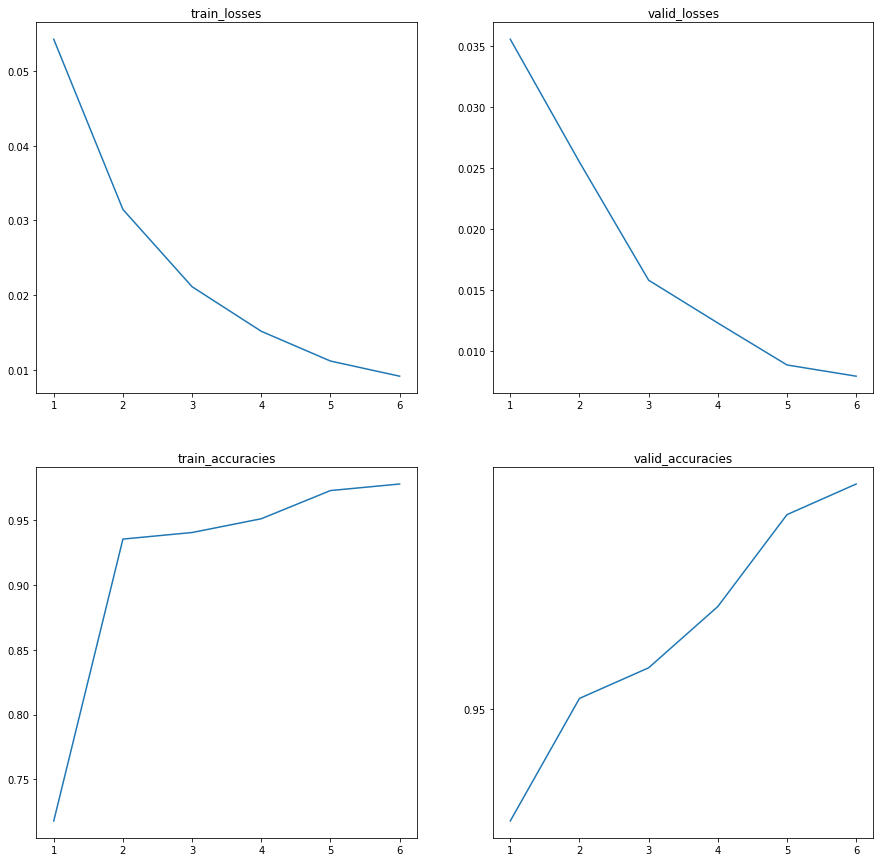

In [22]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=16)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    CUDA_LAUNCH_BLOCKING=1

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()
    
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    x = np.arange(1, epochs+1, 1)

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            train_losses.append(total_loss_train / len(train_data))
            valid_losses.append(total_loss_val / len(val_data))
            train_accuracies.append(total_acc_train / len(train_data))
            valid_accuracies.append(total_acc_val / len(val_data))

            # plotter.plot('loss', 'train', 'cross_entropy Loss', epoch_num, total_loss_train / len(train_data))
            # plotter.plot('accuracy', 'train','Accuracy', epoch_num, total_acc_train / len(train_data))

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
    
    ## Plots of errors and accuracies
    figure, axis = plt.subplots(2, 2,figsize=(15,15))
    # plt.figure(figsize=(10, 10))
    plt.yticks(np.arange(0,1,0.05) )
    axis[0, 0].plot(x, train_losses)
    axis[0, 0].set_title("train_losses")

    axis[0, 1].plot(x, valid_losses)
    axis[0, 1].set_title("valid_losses")

    axis[1, 0].plot(x, train_accuracies)
    axis[1, 0].set_title("train_accuracies")

    axis[1, 1].plot(x, valid_accuracies)
    axis[1, 1].set_title("valid_accuracies")
               
EPOCHS = 6
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

## Model Evaluation

In [23]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    
evaluate(model, df_test)

Test Accuracy:  0.980


In [24]:
texts = [tokenizer(text,padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df_test['EXAMPLES']]

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

if use_cuda:
    model = model.cuda()

predicted_labels = []
with torch.no_grad():
    for predict_input in texts:
          mask = predict_input['attention_mask'].to(device)
          input_id = predict_input['input_ids'].squeeze(1).to(device)

          output = model(input_id, mask)
          predicted_labels.append(output.cpu().argmax(dim=1).tolist()[0])
df_test['clause_predicted'] = predicted_labels
clause = dict((v,k) for k,v in labels.items())
df_test = df_test.replace({"clause_predicted": clause})

In [25]:
df_test.head()

,EXAMPLES,clause,clause_predicted
799,['This Agreement will be governed by the subst...,none,none
988,"['August 6, 2004']",none,none
853,"['""EFFECTIVE DATE"" of this Agreement shall mea...",none,none
2331,Representations and Warranties. The Borrower h...,none,none
242,['14th day of November 2017'],none,none


## Classification Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(df_test['clause'], df_test['clause_predicted']))

               precision    recall  f1-score   support

Force majeure       1.00      0.25      0.40         4
    INDEMNITY       0.83      0.83      0.83         6
 SEVERABILITY       1.00      1.00      1.00         8
         none       0.99      1.00      0.99       230

     accuracy                           0.98       248
    macro avg       0.96      0.77      0.81       248
 weighted avg       0.98      0.98      0.98       248



## Read Contracts

In [ ]:
!pip install python-docx
import docx
from docx import Document
  
# create an instance of a 
# word document we want to open
doc = Document('/content/Law_Insider__master-service-agreement_Filed_03-08-2021_Contract.docx')
  
# print the list of paragraphs in the document
print('List of paragraph objects:->>>')
print(doc.paragraphs)
for p in doc.paragraphs:
    print(p.text)

## Doc to Excel

In [ ]:
!pip install xlsxwriter 

In [ ]:
# import xlsxwriter module
import xlsxwriter

workbook = xlsxwriter.Workbook('predict.xlsx')
worksheet = workbook.add_worksheet()

# Start from the first cell.
# Rows and columns are zero indexed.
row = 0
column = 0

# iterating through content list
for item in doc.paragraphs :

	# write operation perform
	worksheet.write(row, column, item.text)

	# incrementing the value of row by one
	# with each iterations.
	row += 1
	
workbook.close()

In [ ]:
predict_df = pd.read_excel("/content/predict.xlsx",header=None)
predict_df.columns =['EXAMPLES']
predict_df['EXAMPLES'].apply(str)
predict_df.dropna(inplace = True)
predict_df.head()

## Inference

In [ ]:
def predict(model, predict_data):

    texts = [tokenizer(text,padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in predict_data['EXAMPLES']]


    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    predicted_labels = []
    with torch.no_grad():

        for predict_input in texts:

              mask = predict_input['attention_mask'].to(device)
              input_id = predict_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)
              predicted_labels.append(output.cpu().argmax(dim=1).tolist()[0])
    predict_data['clause'] = predicted_labels
    clause = dict((v,k) for k,v in labels.items())
    predict_data = predict_data.replace({"clause": clause})
    return predict_data
    
predict(model, predict_df)

In [ ]:
## Save the inference results as a csv file
df = predict(model, predict_df)
df.to_csv("/content/Law_Insider__master-service-agreement_Filed_03-08-2021_Contract.csv",index=0)